# 06 Evaluate Model

This notebook evaluates the trained model, calculates accuracy, and generates a confusion matrix.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from ds_logger import start_logging, end_logging

notebook_description = "Evaluates the trained model and saves performance metrics."
start_logging(notebook_name='06_evaluate_model.ipynb', notebook_description=notebook_description)

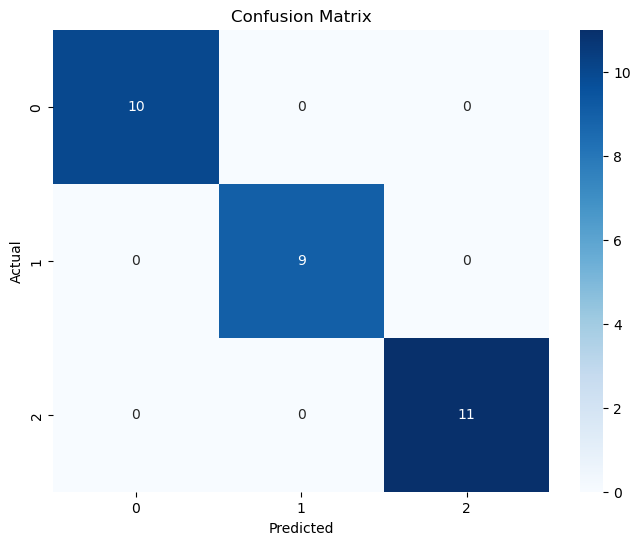

In [2]:
# Find the latest model file
model_dir = '../models'
latest_model_file = max([os.path.join(model_dir, f) for f in os.listdir(model_dir) if f.startswith('iris_model') and f.endswith('.joblib')], key=os.path.getctime)
model = joblib.load(latest_model_file)

# Find the latest feature data file
processed_data_dir = '../data/processed'
latest_feature_file = max([os.path.join(processed_data_dir, f) for f in os.listdir(processed_data_dir) if f.startswith('iris_features') and f.endswith('.csv')], key=os.path.getctime)
df = pd.read_csv(latest_feature_file)

# Prepare data for evaluation
X = df.drop('target', axis=1)
y = df['target']
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

# Generate and save confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
cm_plot_path = '../reports/confusion_matrix.png'
plt.savefig(cm_plot_path)

In [3]:
end_logging(results={'accuracy': accuracy})